## 01 - Importes

In [1]:
!pip install -q aeon

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 65.2 MB/s eta 0:00:00


In [2]:
import numpy as np
import pandas as pd

import torch
from torch import nn
import torch.optim as optim
from torch.nn import functional as F
from torch.utils.data import Dataset, DataLoader


import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader

from aeon.datasets import load_arrow_head, load_basic_motions


from sklearn.model_selection import train_test_split

import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

## 02 - Data

In [4]:
X_train = pd.read_csv('/content/ECG5000_TRAIN.tsv', delimiter='\t', header=None)

In [5]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,1,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,...,0.160348,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137
1,1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,...,0.560327,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250
2,1,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,...,1.284825,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797
3,1,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,...,0.491173,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564
4,1,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,...,0.966606,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,4,-0.478577,-1.779959,-2.398159,-3.170112,-3.559732,-3.573956,-2.989770,-2.270605,-1.688277,...,1.294840,1.160885,1.456331,2.209421,2.507175,2.198534,1.705849,1.492642,1.561890,1.520161
496,4,-1.325210,-2.480992,-2.965356,-3.342392,-3.176351,-2.891528,-2.369679,-1.598750,-1.071751,...,0.552076,-0.172154,-0.864803,-1.549854,-2.460243,-3.366562,-3.466546,-2.718380,-1.855209,-1.539958
497,4,-0.021964,-0.912434,-1.903353,-2.662829,-3.122156,-3.451490,-3.392982,-2.929937,-2.256294,...,1.528745,1.339479,1.457995,2.128078,2.630759,2.295748,1.764967,1.444280,1.432347,1.457028
498,5,0.288011,-1.098020,-2.500250,-3.598599,-3.650608,-3.281587,-2.231601,-1.250656,-1.072574,...,0.081634,-0.029242,0.071414,0.118161,-0.071967,-0.171214,0.131211,0.049872,0.010915,-0.081534


In [6]:
# X_train = pd.read_csv('/content/Adiac_TRAIN.tsv', delimiter='\t', header=None)
y_train = X_train[0].to_numpy() - 1

X_train = X_train.drop(columns=[0])
X_train = X_train.to_numpy()


In [7]:
X_test = pd.read_csv('/content/ECG5000_TEST.tsv', delimiter='\t', header=None)
y_test = X_test[0].to_numpy() - 1

X_test = X_test.drop(columns=[0])
X_test = X_test.to_numpy()


In [8]:
X_train_mean = X_train.mean()
X_train_std = X_train.std()
X_train = (X_train - X_train_mean)/(X_train_std)
X_test = (X_test - X_train_mean)/(X_train_std)

In [9]:
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

In [10]:
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test,
                                                test_size=0.5,
                                                stratify = y_test,
                                                random_state=42)

In [11]:
y_test.shape, y_val.shape

((2250,), (2250,))

In [12]:
num_classes = np.unique(y_train).shape[0]  # Número de classes

In [13]:
y_train.shape, y_val.shape, y_test.shape

((500,), (2250,), (2250,))

In [14]:
np.unique(y_train)

array([0, 1, 2, 3, 4])

In [15]:
# Criando uma classe personalizada de Dataset
class TimeSeriesDataset(Dataset):
    def __init__(self, data, labels):
        """
        Args:
            data: np.ndarray ou tensor com shape (n_cases, n_channels, n_timepoints)
            labels: np.ndarray ou tensor com os rótulos correspondentes
        """
        self.data = torch.tensor(data, dtype=torch.float32)  # Convertendo para tensor
        self.labels = torch.tensor(labels, dtype=torch.long)  # Labels como inteiros

        # num_classes = np.unique(labels).shape[0]  # Número de classes únicas
        # self.labels = F.one_hot(self.labels, num_classes=num_classes)

    def __len__(self):
        # Retorna o número total de amostras
        return len(self.data)

    def __getitem__(self, idx):
        # Retorna um único par (amostra, label) dado um índice
        return self.data[idx], self.labels[idx]




In [16]:
batch_size = 16

dataset_train = TimeSeriesDataset(X_train, y_train)
dataset_val = TimeSeriesDataset(X_val, y_val)
dataset_test = TimeSeriesDataset(X_test, y_test)

dataloader_train = DataLoader(dataset_train, batch_size=batch_size, shuffle=True)
dataloader_val = DataLoader(dataset_val, batch_size=batch_size, shuffle=True)
dataloader_test = DataLoader(dataset_test, batch_size=batch_size, shuffle=True)

# Criando o dataset

# Iterando sobre o DataLoader
# for batch_data, batch_labels in dataloader_train:
#     print("Batch data shape:", batch_data.shape)
#     print("Batch labels shape:", batch_labels.shape)

## 03 - Modelo

In [17]:
class mlp(nn.Module):

    def __init__(self, input_size, n_classes):
        super().__init__()


        self.fully_connected = nn.Sequential(
        nn.Dropout(0.1),
        nn.Linear(input_size,500),
        nn.ReLU(),
        nn.Dropout(0.2),

        nn.Linear(500,500),
        nn.ReLU(),
        nn.Dropout(0.2),

        nn.Linear(500,500),
        nn.ReLU(),
        nn.Dropout(0.2),

        nn.Linear(500, n_classes),
        nn.Dropout(0.3),

        )

        self.initialize_weights()

    def forward(self, x):

        x = self.fully_connected(x)
        return x


    def initialize_weights(self):
        for layer in self.fully_connected:
            if isinstance(layer, nn.Linear):
                nn.init.kaiming_normal_(layer.weight)
                nn.init.zeros_(layer.bias)


In [18]:
input_size =X_train.shape[2] # tamanho de uma série
n_classes = len(np.unique(y_train))

print(f'Input size: {input_size}, n_classes: {n_classes}')

Input size: 140, n_classes: 5


In [19]:
# Configurações gerais
input_dim = input_size  # Dimensão de entrada
output_dim = n_classes
num_epochs = 100
learning_rate = 0.01
seeds = [i for i in range(100)]  # Lista de sementes a serem testadas

In [20]:
# seeds

In [21]:
def train_one_epoch(model, dataloader, optimizer, loss_fn, device):
    model.train()  # Modo de treino
    running_loss = 0.0
    correct_predictions = 0


    for inputs, labels in dataloader:
        inputs, labels = inputs.to(device), labels.to(device)

        # Forward pass
        outputs = model(inputs)

        # Ajuste condicional para dimensões (se necessário)
        if outputs.dim() > 2 and outputs.size(1) == 1:
            outputs = outputs.squeeze(1)

        loss = loss_fn(outputs, labels)

        # Calcular acurácia
        preds = torch.argmax(outputs, dim=1)
        correct_predictions += (preds == labels).sum().item()

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    avg_loss = running_loss / len(dataloader)
    accuracy = correct_predictions / len(dataloader.dataset)

    return avg_loss, accuracy

In [22]:
# Função de avaliação
def evaluate(model, dataloader, loss_fn, device):
    model.eval()  # Modo de avaliação
    running_loss = 0.0
    correct_predictions = 0

    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs)

            # Ajuste condicional para dimensões
            if outputs.dim() > 2 and outputs.size(1) == 1:
                outputs = outputs.squeeze(1)

            loss = loss_fn(outputs, labels)
            running_loss += loss.item()

            # Calcular acurácia
            preds = torch.argmax(outputs, dim=1)
            correct_predictions += (preds == labels).sum().item()

    avg_loss = running_loss / len(dataloader)
    accuracy = correct_predictions / len(dataloader.dataset)
    return avg_loss, accuracy

In [23]:
def train_model(seed):
    torch.manual_seed(seed)

    model = mlp(input_size=input_size, n_classes = n_classes)
    model = model.to(device)

    loss_fn = nn.CrossEntropyLoss()
    optimizer = optim.Adadelta(model.parameters(), lr=0.1, rho=0.95, eps=1e-8)
    train_losses, val_losses, val_accuracies = [], [], []

    print(f'Teste da Seed: {seed}')
    best_model = model
    best_val_acc = 0

    train_metrics_list = []
    val_metrics_list = []
    for epoch in range(num_epochs):
        # Treinamento
        train_loss, train_acc = train_one_epoch(model, dataloader_train, optimizer, loss_fn, device)

        train_metrics_list.append((train_loss, train_acc))



        train_losses.append(train_loss)

        # Avaliação
        val_loss, val_acc = evaluate(model, dataloader_val, loss_fn, device)
        val_metrics_list.append((val_loss, val_acc))



        val_losses.append(val_loss)
        val_accuracies.append(val_acc)

        if val_acc > best_val_acc:
            best_val_acc = val_acc
            best_model = model

        if (epoch + 1) == 50:
            print(f"Epoch {epoch+1}/{num_epochs}")
            print(f"  Train Loss: {train_loss:.4f}")
            print(f"  Validation Loss: {val_loss:.4f}")
            print(f"  Validation Accuracy: {val_acc:.4f}")

    test_loss, test_acc = evaluate(best_model, dataloader_test, loss_fn, device)

    return train_metrics_list, val_metrics_list, test_acc

In [24]:
# Testando diferentes sementes
results = {}
acc_list_total =np.zeros(100)
val_list_total = np.zeros(100)

for seed in seeds:
    train_metrics_list, val_metrics_list, test_acc = train_model(seed)
    train_acc_1, val_acc_1 = train_metrics_list[0][1], val_metrics_list[0][1]

    acc_list = np.array([train_metrics_list[i][1] for i in range(len(train_metrics_list))])
    acc_list_total = (1/2)*(acc_list_total + acc_list)

    val_list = np.array([val_metrics_list[i][1] for i in range(len(val_metrics_list))])
    val_list_total = (1/2)*(val_list_total + val_list)

    results[seed] = train_acc_1, val_acc_1, test_acc
    print(f"Semente: {seed}, train_acc_1: {train_acc_1:.4f}, val_acc_1: {val_acc_1:.4f}, test_acc {test_acc:.4f}")

Teste da Seed: 0
Epoch 50/100
  Train Loss: 0.4412
  Validation Loss: 0.2307
  Validation Accuracy: 0.9413
Semente: 0, train_acc_1: 0.5560, val_acc_1: 0.9018, test_acc 0.9387
Teste da Seed: 1
Epoch 50/100
  Train Loss: 0.4783
  Validation Loss: 0.2224
  Validation Accuracy: 0.9422
Semente: 1, train_acc_1: 0.5060, val_acc_1: 0.8836, test_acc 0.9404
Teste da Seed: 2
Epoch 50/100
  Train Loss: 0.4747
  Validation Loss: 0.2311
  Validation Accuracy: 0.9404
Semente: 2, train_acc_1: 0.4820, val_acc_1: 0.8893, test_acc 0.9387
Teste da Seed: 3
Epoch 50/100
  Train Loss: 0.4361
  Validation Loss: 0.2351
  Validation Accuracy: 0.9396
Semente: 3, train_acc_1: 0.4600, val_acc_1: 0.9191, test_acc 0.9378
Teste da Seed: 4
Epoch 50/100
  Train Loss: 0.4746
  Validation Loss: 0.2344
  Validation Accuracy: 0.9404
Semente: 4, train_acc_1: 0.5600, val_acc_1: 0.9053, test_acc 0.9360
Teste da Seed: 5
Epoch 50/100
  Train Loss: 0.4232
  Validation Loss: 0.2267
  Validation Accuracy: 0.9418
Semente: 5, train_

In [25]:
# results.items()

In [26]:
# results

In [27]:
# Resultados finais
print("\nResultados por semente:")
train_acc_1_list = []
val_acc_1_list = []
test_acc_list = []
for seed, accs in results.items():
    print(f"Semente: {seed}, train_acc_1: {accs[0]:.4}, val_acc_1: {accs[1]:.4}, test_acc {accs[2]:.4}")
    train_acc_1_list.append(accs[0])
    val_acc_1_list.append(accs[1])
    test_acc_list.append(accs[2])


Resultados por semente:
Semente: 0, train_acc_1: 0.556, val_acc_1: 0.9018, test_acc 0.9387
Semente: 1, train_acc_1: 0.506, val_acc_1: 0.8836, test_acc 0.9404
Semente: 2, train_acc_1: 0.482, val_acc_1: 0.8893, test_acc 0.9387
Semente: 3, train_acc_1: 0.46, val_acc_1: 0.9191, test_acc 0.9378
Semente: 4, train_acc_1: 0.56, val_acc_1: 0.9053, test_acc 0.936
Semente: 5, train_acc_1: 0.582, val_acc_1: 0.8956, test_acc 0.9404
Semente: 6, train_acc_1: 0.532, val_acc_1: 0.9049, test_acc 0.9409
Semente: 7, train_acc_1: 0.384, val_acc_1: 0.8733, test_acc 0.9378
Semente: 8, train_acc_1: 0.5, val_acc_1: 0.8991, test_acc 0.9391
Semente: 9, train_acc_1: 0.472, val_acc_1: 0.9004, test_acc 0.9413
Semente: 10, train_acc_1: 0.326, val_acc_1: 0.8933, test_acc 0.94
Semente: 11, train_acc_1: 0.526, val_acc_1: 0.9027, test_acc 0.9391
Semente: 12, train_acc_1: 0.448, val_acc_1: 0.9062, test_acc 0.9409
Semente: 13, train_acc_1: 0.538, val_acc_1: 0.8911, test_acc 0.9418
Semente: 14, train_acc_1: 0.534, val_acc

In [28]:
train_acc_1_mean, val_acc_1_mean, test_acc_mean = np.mean(train_acc_1_list), np.mean(val_acc_1_list), np.mean(test_acc_list)
train_acc_1_std, val_acc_1_std, test_acc_std = np.std(train_acc_1_list), np.std(val_acc_1_list), np.std(test_acc_list)

In [29]:
print(f"Média de train_acc_1: {train_acc_1_mean:.4f}, Desvio padrão: {train_acc_1_std:.4f}")
print(f"Média de val_acc_1: {val_acc_1_mean:.4f}, Desvio padrão: {val_acc_1_std:.4f}")
print(f"Média de test_acc: {test_acc_mean:.4f}, Desvio padrão: {test_acc_std:.4f}")

Média de train_acc_1: 0.4591, Desvio padrão: 0.0864
Média de val_acc_1: 0.8951, Desvio padrão: 0.0179
Média de test_acc: 0.9387, Desvio padrão: 0.0015


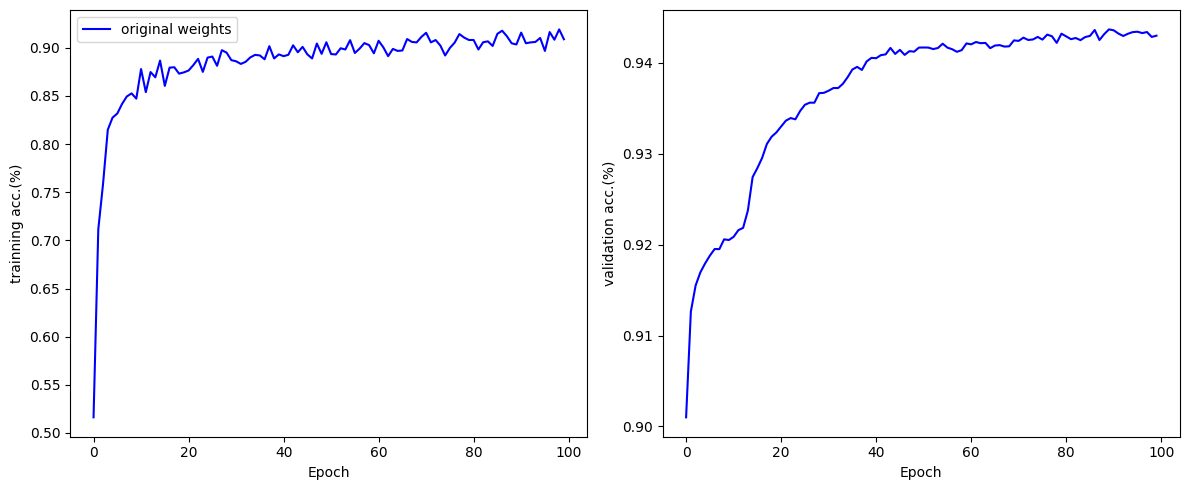

In [30]:
plt.figure(figsize=(12, 5))

# Primeiro gráfico: Acurácia de treino
plt.subplot(1, 2, 1)  # 1 linha, 2 colunas, 1º gráfico
plt.plot(acc_list_total, label='original weights', color='blue')
#, linestyle='dashed'
plt.xlabel("Epoch")
plt.ylabel("trainning acc.(%)")
plt.legend()

# Segundo gráfico: Acurácia de validação
plt.subplot(1, 2, 2)  # 1 linha, 2 colunas, 2º gráfico
plt.plot(val_list_total, label='Validation Accuracy', color='blue')
plt.xlabel("Epoch")
plt.ylabel("validation acc.(%)")
# plt.legend()

# Mostrar os gráficos
plt.tight_layout()  # Ajusta o layout automaticamente
plt.show()


In [31]:
# # 1 = sentimento positivo ou 0 = sentimento negativo

# model = mlp(input_size=input_size, n_classes = n_classes)
# model = model.to(device)

# loss_fn = nn.CrossEntropyLoss()
# optimizer = optim.Adadelta(model.parameters(), lr=0.1, rho=0.95, eps=1e-8)

## PA rewiring method

- @author: scabini

In [32]:
def rewiring_np(weights, seed):
    dimensions = weights.shape
    if seed:
        rng = np.random.default_rng(seed)
    else:
        rng = np.random.default_rng()
    st = np.zeros(dimensions[1])
    for neuron in range(1,dimensions[0]): #loops over output neurons from 2 to n-1
        st = st + weights[neuron-1]   #compute the temporary strength
        P = st + np.abs(np.min(st)) + 1 #make the distribution positive and avoid null probability
        P = P / np.sum(P) #pdf from negative to positive
        targets = rng.choice(a=[i for i in range(dimensions[1])], replace=False,
                                      size=dimensions[1],p=P)
        edges_to_rewire = np.argsort(weights[neuron]) #sort the edges to be rewired
        weights[neuron, targets] = weights[neuron, edges_to_rewire] #rewiring
    return weights

In [33]:
def rewiring_torch(weights, seed):
    if seed:
        rng = np.random.default_rng(seed)
    else:
        rng = np.random.default_rng()
    st = torch.zeros(weights.size(1))
    with torch.no_grad():
        dimensions = weights.shape
        for neuron in range(1,dimensions[0]):
            st = st + weights[neuron-1]
            P = st + torch.abs(torch.min(st)) + 1 #the +1 is to ensure no zero values
            P = P / torch.sum(P)
            targets = rng.choice(a=[i for i in range(dimensions[1])], replace=False,
                                          size=dimensions[1],p=P.cpu().detach().numpy())
            edges_to_rewire = torch.argsort(weights[neuron])
            weights[neuron, targets] = weights[neuron, edges_to_rewire]
    return weights

In [34]:
### Numpy version: has better numerical precision than the torch version;
#   however, it creates a copy of the weight tensor
def PA_rewiring_np(weights, seed=False):
    if weights.ndimension() < 2:
        raise ValueError("Only tensors with 2 or more dimensions are supported")
    output_neurons = weights.size(0)
    input_neurons = weights.numel() // output_neurons
    dimensions = weights.shape
    weights_out = weights.cpu().detach().numpy()
    weights_out = weights_out.reshape((output_neurons, input_neurons))
    rewiring_np(weights_out, seed) #rewire input neurons
    rewiring_np(np.transpose(weights_out), seed) #rewire output neurons
    weights_out = weights_out.reshape((dimensions))
    weights_out=torch.from_numpy(weights_out)
    with torch.no_grad():
        weights.view_as(weights_out).copy_(weights_out)
    return weights  #cast the obtained tensor into the input tensor 'weights'

In [35]:
### Pytorch implementation: looses precision on large sums compared to
#   numpy, i.e., the strength calculations will be different.
#   I recommend using the np version (but check efficiency)
def PA_rewiring_torch(weights, seed=False):
    if weights.ndimension() < 2:
        raise ValueError("Only tensors with 2 or more dimensions are supported")
    with torch.no_grad():
        output_neurons = weights.size(0)
        input_neurons = weights.numel() // output_neurons
        dimensions = weights.shape
        weights = weights.reshape((output_neurons, input_neurons))
        rewiring_torch(weights, seed)
        rewiring_torch(torch.transpose(weights, 0, 1), seed)
        weights = weights.reshape((dimensions))
    return weights  #cast the obtained tensor into the input tensor 'weights'

In [36]:
def stabilize_strength(initializer, weights, K=100): #how much stable? =) increase K!
### random search to minimize strength variance
#initializer is a lambda function that receives the weights, eg:
# initializer = lambda w : torch.nn.init.kaiming_normal_(w, mode='fan_in', nonlinearity='relu')
#or simply:
# initializer = torch.nn.init.orthogonal_
#weights is a torch weight matrix taken from a layer
    maximus = np.Infinity
    dimensions = weights.shape
    output_neurons = weights.size(0)
    input_neurons = weights.numel() // output_neurons
    weights_out = torch.empty(dimensions)
    for i in range(K):
        initializer(weights)
        weights = weights.reshape((output_neurons, input_neurons))
        localmax = torch.mean(torch.hstack((torch.var(torch.sum(weights, dim=0) ), torch.var(torch.sum(weights, dim=1) ))))
        if localmax < maximus:
            maximus = localmax
            with torch.no_grad():
                weights_out.view_as(weights).copy_(weights)

    with torch.no_grad():
        weights.view_as(weights_out.reshape(dimensions)).copy_(weights_out.reshape(dimensions))

    return weights


- Refazer a estrutura, mas agora aplicando a técnica do PARw

In [37]:
def train_model_parw(seed):
    torch.manual_seed(seed)

    model = mlp(input_size=input_size, n_classes = n_classes)
    model = model.to(device)

    #########################
    for m in model.modules():
        if isinstance(m, torch.nn.Conv2d) or isinstance(m, torch.nn.Linear):
            PA_rewiring_np(m.weight)
    #########################

    loss_fn = nn.CrossEntropyLoss()
    optimizer = optim.Adadelta(model.parameters(), lr=0.1, rho=0.95, eps=1e-8)
    train_losses, val_losses, val_accuracies = [], [], []

    print(f'Teste da Seed: {seed}')
    best_model = model
    best_val_acc = 0
    train_metrics_list = []
    val_metrics_list = []
    for epoch in range(num_epochs):
        # Treinamento
        train_loss, train_acc = train_one_epoch(model, dataloader_train, optimizer, loss_fn, device)

        train_metrics_list.append((train_loss, train_acc))



        train_losses.append(train_loss)

        # Avaliação
        val_loss, val_acc = evaluate(model, dataloader_val, loss_fn, device)
        val_metrics_list.append((val_loss, val_acc))



        val_losses.append(val_loss)
        val_accuracies.append(val_acc)

        if val_acc > best_val_acc:
            best_val_acc = val_acc
            best_model = model

        if (epoch + 1) == 50:
            print(f"Epoch {epoch+1}/{num_epochs}")
            print(f"  Train Loss: {train_loss:.4f}")
            print(f"  Validation Loss: {val_loss:.4f}")
            print(f"  Validation Accuracy: {val_acc:.4f}")

    test_loss, test_acc = evaluate(best_model, dataloader_test, loss_fn, device)

    return train_metrics_list, val_metrics_list, test_acc

In [38]:
# Testando diferentes sementes
results = {}
acc_list_total_parw = np.zeros(100)
val_list_total_parw = np.zeros(100)

for seed in seeds:
    train_metrics_list, val_metrics_list, test_acc = train_model_parw(seed)
    train_acc_1, val_acc_1 = train_metrics_list[0][1], val_metrics_list[0][1]

    acc_list = np.array([train_metrics_list[i][1] for i in range(len(train_metrics_list))])
    acc_list_total_parw = (1/2)*(acc_list_total_parw + acc_list)

    val_list = np.array([val_metrics_list[i][1] for i in range(len(val_metrics_list))])
    val_list_total_parw = (1/2)*(val_list_total_parw + val_list)

    results[seed] = train_acc_1, val_acc_1, test_acc
    print(f"Semente: {seed}, train_acc_1: {train_acc_1:.4f}, val_acc_1: {val_acc_1:.4f}, test_acc {test_acc:.4f}")

Teste da Seed: 0
Epoch 50/100
  Train Loss: 0.4048
  Validation Loss: 0.2239
  Validation Accuracy: 0.9431
Semente: 0, train_acc_1: 0.5100, val_acc_1: 0.9191, test_acc 0.9418
Teste da Seed: 1
Epoch 50/100
  Train Loss: 0.4161
  Validation Loss: 0.2159
  Validation Accuracy: 0.9418
Semente: 1, train_acc_1: 0.5180, val_acc_1: 0.9040, test_acc 0.9409
Teste da Seed: 2
Epoch 50/100
  Train Loss: 0.4563
  Validation Loss: 0.2269
  Validation Accuracy: 0.9431
Semente: 2, train_acc_1: 0.4980, val_acc_1: 0.9182, test_acc 0.9409
Teste da Seed: 3
Epoch 50/100
  Train Loss: 0.4555
  Validation Loss: 0.2323
  Validation Accuracy: 0.9404
Semente: 3, train_acc_1: 0.4120, val_acc_1: 0.9147, test_acc 0.9400
Teste da Seed: 4
Epoch 50/100
  Train Loss: 0.4402
  Validation Loss: 0.2304
  Validation Accuracy: 0.9404
Semente: 4, train_acc_1: 0.4720, val_acc_1: 0.8880, test_acc 0.9409
Teste da Seed: 5
Epoch 50/100
  Train Loss: 0.4045
  Validation Loss: 0.2225
  Validation Accuracy: 0.9413
Semente: 5, train_

In [39]:
# Resultados finais
print("\nResultados por semente:")
train_acc_1_list = []
val_acc_1_list = []
test_acc_list = []
for seed, accs in results.items():
    print(f"Semente: {seed}, train_acc_1: {accs[0]:.4}, val_acc_1: {accs[1]:.4}, test_acc {accs[2]:.4}")
    train_acc_1_list.append(accs[0])
    val_acc_1_list.append(accs[1])
    test_acc_list.append(accs[2])


Resultados por semente:
Semente: 0, train_acc_1: 0.51, val_acc_1: 0.9191, test_acc 0.9418
Semente: 1, train_acc_1: 0.518, val_acc_1: 0.904, test_acc 0.9409
Semente: 2, train_acc_1: 0.498, val_acc_1: 0.9182, test_acc 0.9409
Semente: 3, train_acc_1: 0.412, val_acc_1: 0.9147, test_acc 0.94
Semente: 4, train_acc_1: 0.472, val_acc_1: 0.888, test_acc 0.9409
Semente: 5, train_acc_1: 0.472, val_acc_1: 0.9133, test_acc 0.944
Semente: 6, train_acc_1: 0.45, val_acc_1: 0.9022, test_acc 0.9422
Semente: 7, train_acc_1: 0.52, val_acc_1: 0.9004, test_acc 0.94
Semente: 8, train_acc_1: 0.54, val_acc_1: 0.9147, test_acc 0.9409
Semente: 9, train_acc_1: 0.436, val_acc_1: 0.9049, test_acc 0.9418
Semente: 10, train_acc_1: 0.528, val_acc_1: 0.9231, test_acc 0.9409
Semente: 11, train_acc_1: 0.45, val_acc_1: 0.9138, test_acc 0.9418
Semente: 12, train_acc_1: 0.474, val_acc_1: 0.8964, test_acc 0.9436
Semente: 13, train_acc_1: 0.558, val_acc_1: 0.8978, test_acc 0.9422
Semente: 14, train_acc_1: 0.562, val_acc_1: 0

In [40]:
train_acc_1_pwd_mean, val_acc_1_pwd_mean, test_acc_pwd_mean = np.mean(train_acc_1_list), np.mean(val_acc_1_list), np.mean(test_acc_list)
train_acc_1_pwd_std, val_acc_1_pwd_std, test_acc_pwd_std = np.std(train_acc_1_list), np.std(val_acc_1_list), np.std(test_acc_list)

In [41]:
print(f"Média de train_acc_1: {train_acc_1_pwd_mean:.4f}, Desvio padrão: {train_acc_1_pwd_std:.4f}")
print(f"Média de val_acc_1: {val_acc_1_pwd_mean:.4f}, Desvio padrão: {val_acc_1_pwd_std:.4f}")
print(f"Média de test_acc: {test_acc_pwd_mean:.4f}, Desvio padrão: {test_acc_pwd_std:.4f}")

Média de train_acc_1: 0.4999, Desvio padrão: 0.0555
Média de val_acc_1: 0.9088, Desvio padrão: 0.0089
Média de test_acc: 0.9416, Desvio padrão: 0.0013


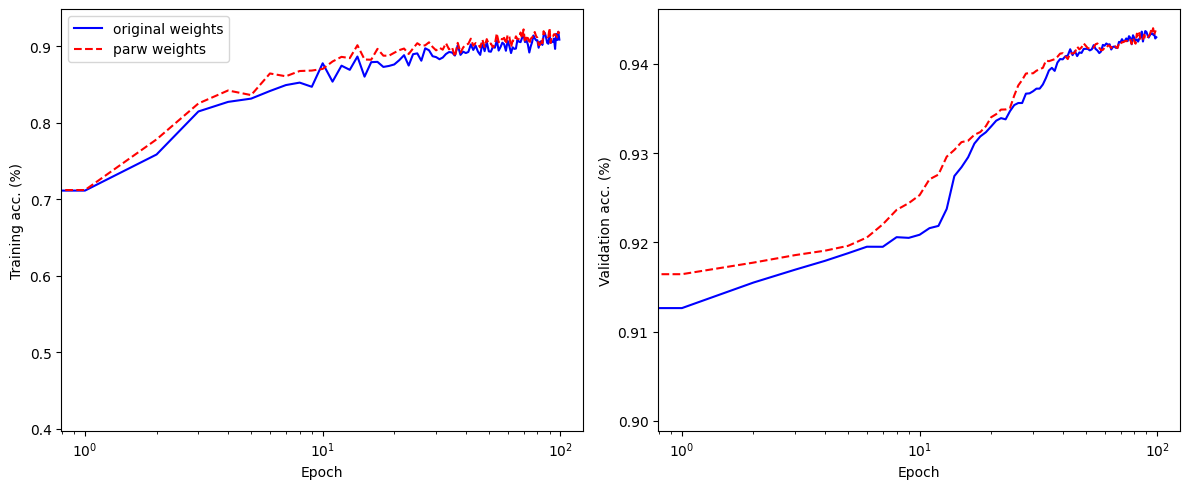

In [42]:
plt.figure(figsize=(12, 5))

# Primeiro gráfico: Acurácia de treino
plt.subplot(1, 2, 1)  # 1 linha, 2 colunas, 1º gráfico
plt.plot(acc_list_total, label='original weights', color='blue')
plt.plot(acc_list_total_parw, label='parw weights', color='red', linestyle='dashed')
plt.xscale('log')  # Escala logarítmica no eixo x
plt.xlabel("Epoch")
plt.ylabel("Training acc. (%)")
plt.legend()

# Segundo gráfico: Acurácia de validação
plt.subplot(1, 2, 2)  # 1 linha, 2 colunas, 2º gráfico
plt.plot(val_list_total, label='Validation Accuracy', color='blue')
plt.plot(val_list_total_parw, label='parw weights', color='red', linestyle='dashed')
plt.xscale('log')  # Escala logarítmica no eixo x
plt.xlabel("Epoch")
plt.ylabel("Validation acc. (%)")

# Mostrar os gráficos
plt.tight_layout()  # Ajusta o layout automaticamente

plt.savefig('mlp_ecg5000.png', dpi=300)
plt.show()

In [43]:
print(f"Média de train_acc_normal_1: {train_acc_1_mean:.4f}, Desvio padrão: {train_acc_1_std:.4f}")
print(f"Média de val_acc_normal_1: {val_acc_1_mean:.4f}, Desvio padrão: {val_acc_1_std:.4f}")
print(f"Média de test_acc_normal: {test_acc_mean:.4f}, Desvio padrão: {test_acc_std:.4f}")
print("\n################\n")
print(f"Média de train_acc_1: {train_acc_1_pwd_mean:.4f}, Desvio padrão: {train_acc_1_pwd_std:.4f}")
print(f"Média de val_acc_1: {val_acc_1_pwd_mean:.4f}, Desvio padrão: {val_acc_1_pwd_std:.4f}")
print(f"Média de test_acc: {test_acc_pwd_mean:.4f}, Desvio padrão: {test_acc_pwd_std:.4f}")

Média de train_acc_normal_1: 0.4591, Desvio padrão: 0.0864
Média de val_acc_normal_1: 0.8951, Desvio padrão: 0.0179
Média de test_acc_normal: 0.9387, Desvio padrão: 0.0015

################

Média de train_acc_1: 0.4999, Desvio padrão: 0.0555
Média de val_acc_1: 0.9088, Desvio padrão: 0.0089
Média de test_acc: 0.9416, Desvio padrão: 0.0013
